<a href="https://colab.research.google.com/github/abhagyacharan/OCR/blob/main/OCR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.append("/content/drive/MyDrive/vir_env/lib/python3.10/site-packages")

**1.Installing Dependencies**

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.9 MB/s eta 0:00:00


In [4]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

**2.Read in Images or Videos**

In [7]:
img_path = '/content/sign.png'

In [9]:
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(img_path)
print(result)

[([[19, 181], [165, 181], [165, 201], [19, 201]], 'HEAD PROTECTION', 0.9750309645797631), ([[31, 201], [153, 201], [153, 219], [31, 219]], 'MUST BE WORN', 0.9762943230266249), ([[39, 219], [145, 219], [145, 237], [39, 237]], 'ON THIS SITE', 0.9745307472331675)]


**3.Draw Results**

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
FONT = cv2.FONT_HERSHEY_SIMPLEX

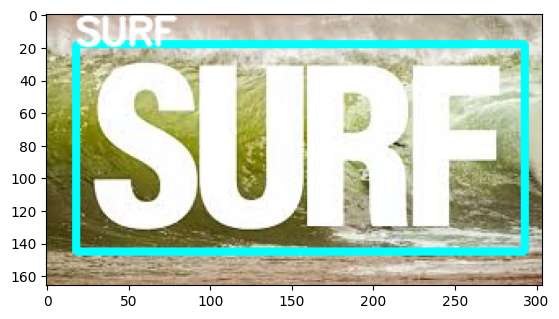

In [ ]:
img = cv2.imread(img_path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,255),3)
img = cv2.putText(img,text,top_left,FONT,.75,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()


In [ ]:
def show_res(path):
  img_path = path
  reader = easyocr.Reader(['en'],gpu=True)
  result = reader.readtext(img_path)
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  FONT = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.imread(img_path)
  img = cv2.rectangle(img,top_left,bottom_right,(0,255,255),3)
  img = cv2.putText(img,text,top_left,FONT,.75,(255,255,0),2,cv2.LINE_AA)
  plt.imshow(img)
  plt.show()

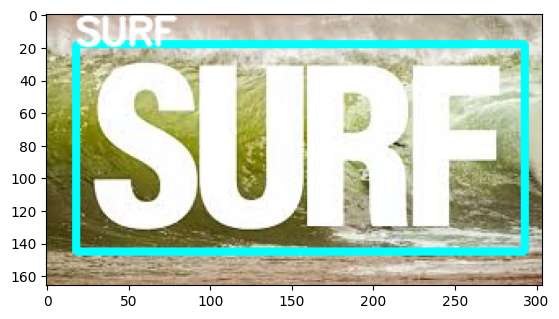

In [ ]:
show_res('/content/surf.jpeg')

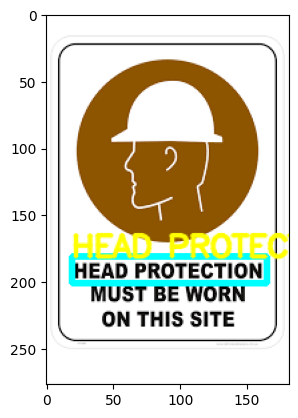

In [ ]:
show_res("/content/sign.png")

**4.Handling Multiple Lines**

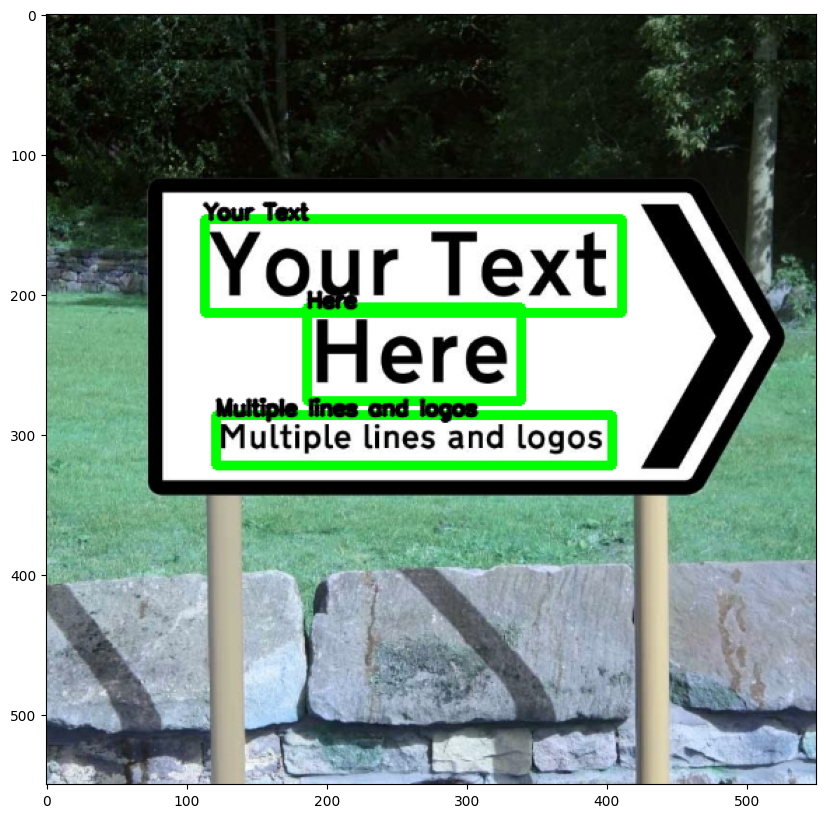

In [19]:
def show_res(path):
  img_path = path
  img = cv2.imread(img_path)
  reader = easyocr.Reader(['en'],gpu=True)
  result = reader.readtext(img_path)
  for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img = cv2.putText(img,text,top_left,font,.5,(0,0,0),2,cv2.LINE_AA)

  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()

show_res('/content/test1.jpeg')


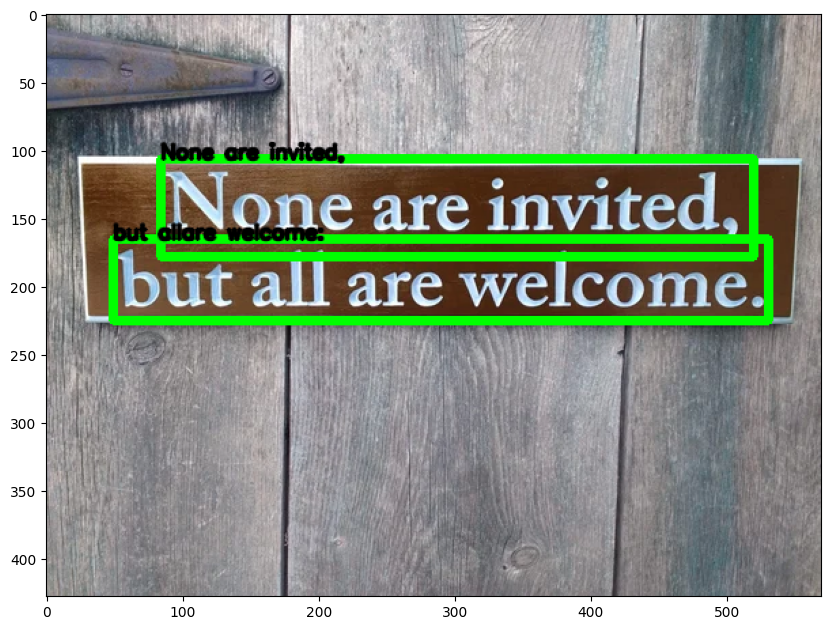

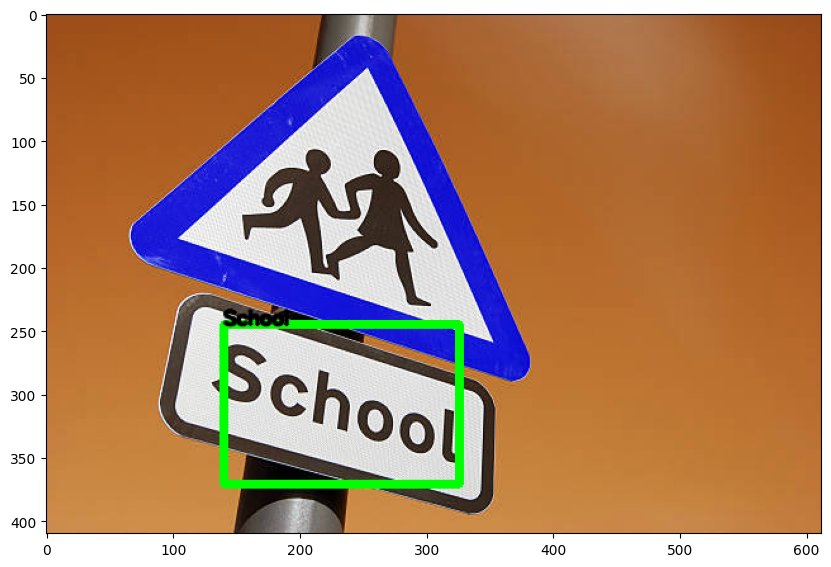

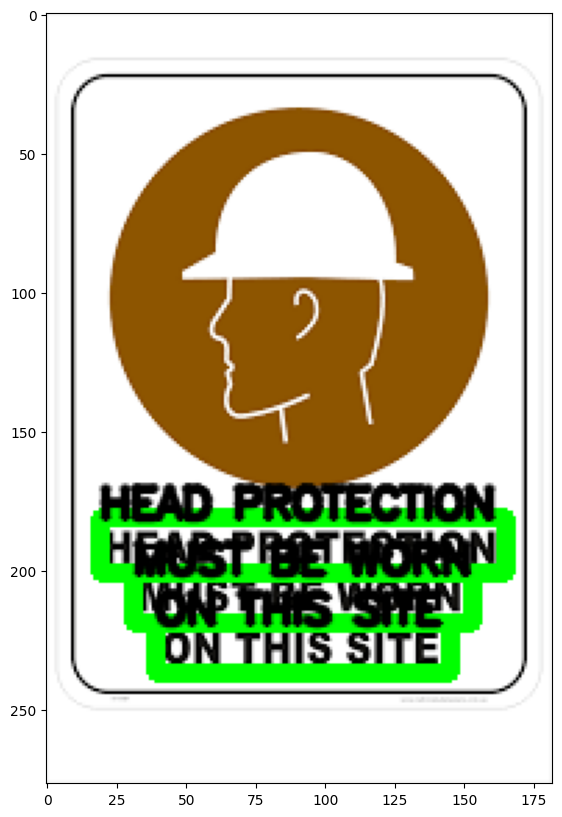

In [20]:
show_res('/content/test2.webp')
show_res('/content/school_sign.jpg')
show_res('/content/sign.png')